# EDGES AND CORNERS ALGORITHMS

### NON - CHEAT IMAGE

In [1]:
import numpy as np
import cv2
image_path = r"D:\CV_DATASETS\noncheat\Screenshot 2024-02-22 022941.jpg"
image = cv2.imread(image_path)
image

array([[[254, 254, 254],
        [252, 252, 252],
        [221, 221, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [252, 252, 252],
        [221, 221, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [252, 252, 252],
        [221, 221, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [252, 252, 252],
        [221, 221, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [252, 252, 252],
        [221, 221, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [252, 252, 252],
        [221, 221, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### GETTING A PRE PROCESSED IMAGE

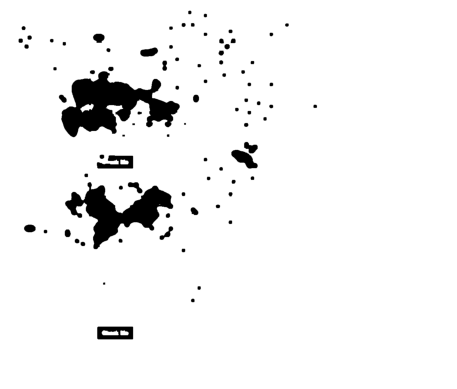

In [2]:
from matplotlib import pyplot as plt
import cv2

image_path = r"D:\CV_DATASETS\noncheat\Screenshot 2024-02-22 022941.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

threshold_value = 127 
max_value = 255
_, binary_image = cv2.threshold(blurred_image, threshold_value, max_value, cv2.THRESH_BINARY)

kernel_size = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

new_width, new_height = 1270, 1074

resized_closed_image = cv2.resize(closed_image, (new_width, new_height))
resized_closed_image = cv2.cvtColor(resized_closed_image, cv2.COLOR_BGR2RGB)

plt.imshow(resized_closed_image)
plt.axis('off')
plt.show()

### Adaptive thresholding

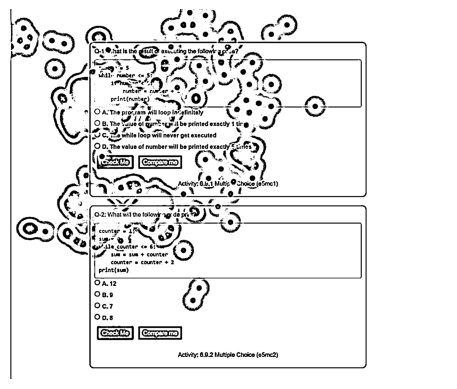

In [3]:

adaptive_thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

new_width, new_height = 1270, 1074
resized_adaptive_thresh = cv2.resize(adaptive_thresh, (new_width, new_height))

plt.imshow(cv2.cvtColor(resized_adaptive_thresh, cv2.COLOR_GRAY2RGB)) 
plt.axis('off')
plt.show()

### Otsu's thresholding

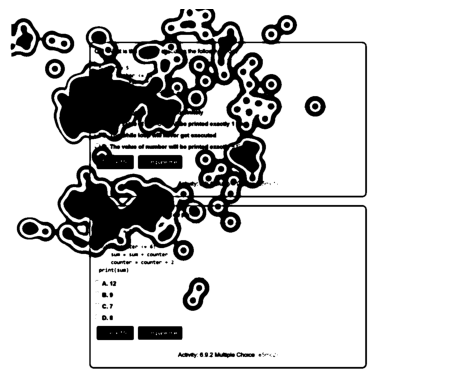

In [4]:
_, otsu_thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

resized_otsu_thresh = cv2.resize(otsu_thresh, (new_width, new_height))


plt.imshow(cv2.cvtColor(resized_otsu_thresh, cv2.COLOR_GRAY2RGB)) 
plt.axis('off')
plt.show()

## EDGE DETECTION ALGORITHM - CANNY

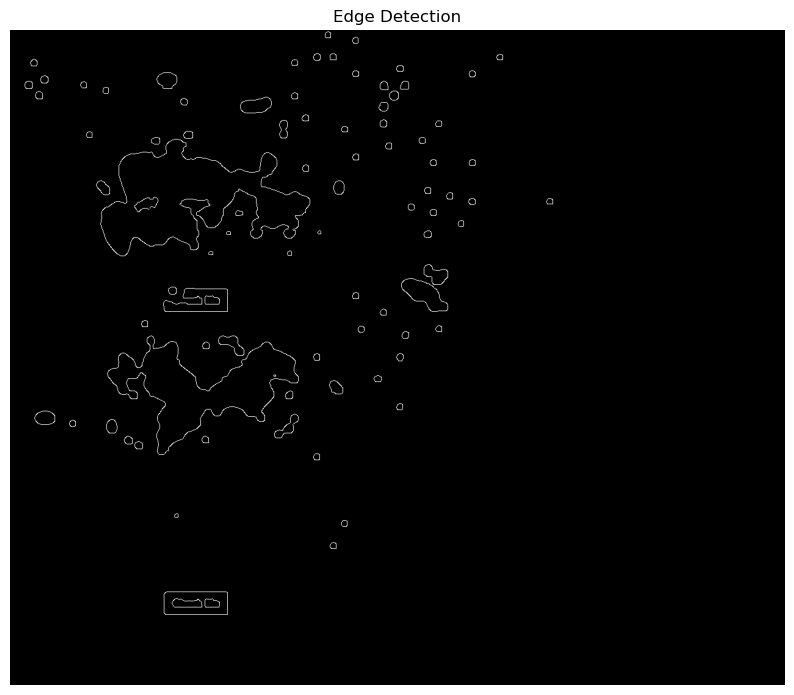

In [5]:
lower_threshold = 50  
upper_threshold = 150

edges = cv2.Canny(resized_closed_image, lower_threshold, upper_threshold)

plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

In [6]:
if len(resized_closed_image.shape) == 3 and resized_closed_image.shape[2] == 3:
    gray_closed_image = cv2.cvtColor(resized_closed_image, cv2.COLOR_BGR2GRAY)
else:
    gray_closed_image = resized_closed_image.copy()

## CORNER DETECTION ALGORITHM - HARRIS

In [7]:
gray_closed_image_float32 = np.float32(gray_closed_image)

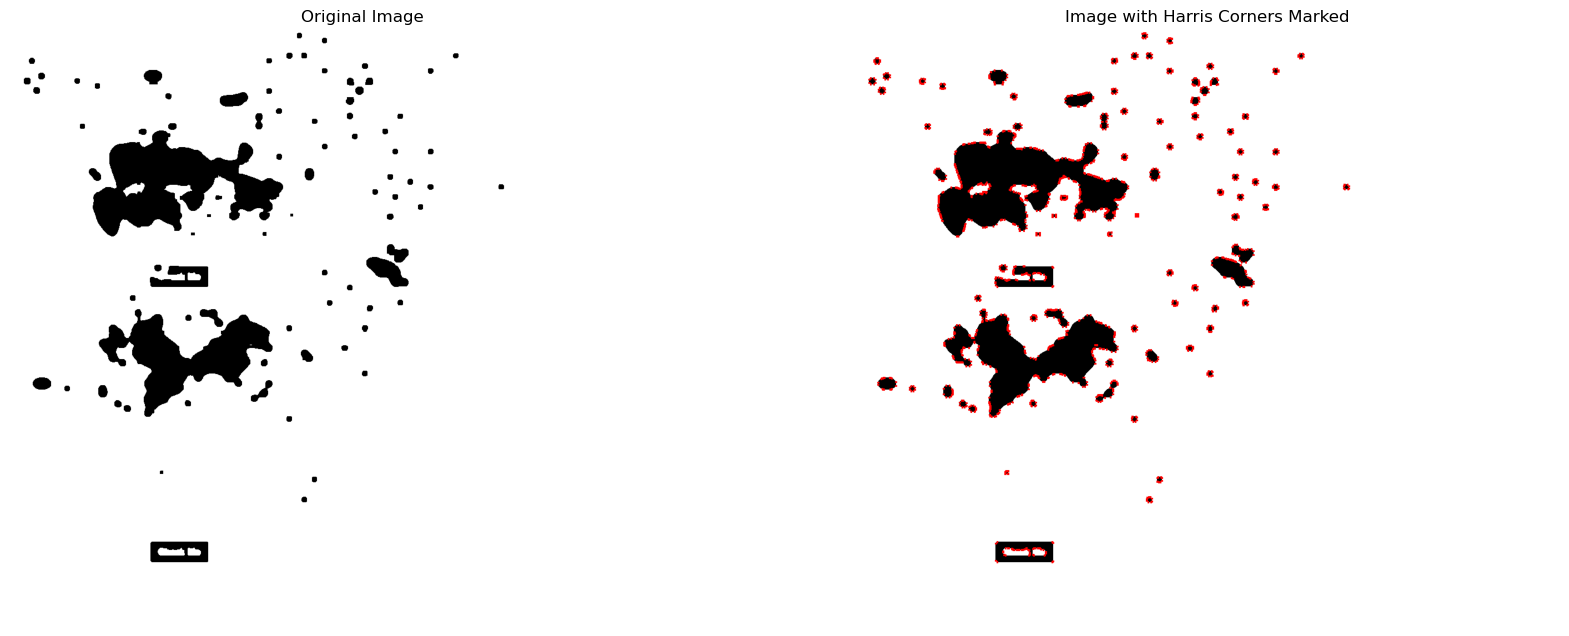

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

block_size = 2  
ksize = 3    
k = 0.04     

dst = cv2.cornerHarris(gray_closed_image_float32, block_size, ksize, k)

dst_dilated = cv2.dilate(dst, None)

if len(resized_closed_image.shape) == 2 or resized_closed_image.shape[2] == 1:

    image_for_marking = cv2.cvtColor(resized_closed_image, cv2.COLOR_GRAY2BGR)
else:

    image_for_marking = resized_closed_image.copy()

threshold = 0.01 * dst.max()
image_for_marking[dst_dilated > threshold] = [0, 0, 255]  

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
if len(resized_closed_image.shape) == 2 or resized_closed_image.shape[2] == 1:
    plt.imshow(resized_closed_image, cmap='gray')
else:
    plt.imshow(cv2.cvtColor(resized_closed_image, cv2.COLOR_BGR2RGB)) 
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_for_marking, cv2.COLOR_BGR2RGB)) 
plt.title('Image with Harris Corners Marked')
plt.axis('off')

plt.show()


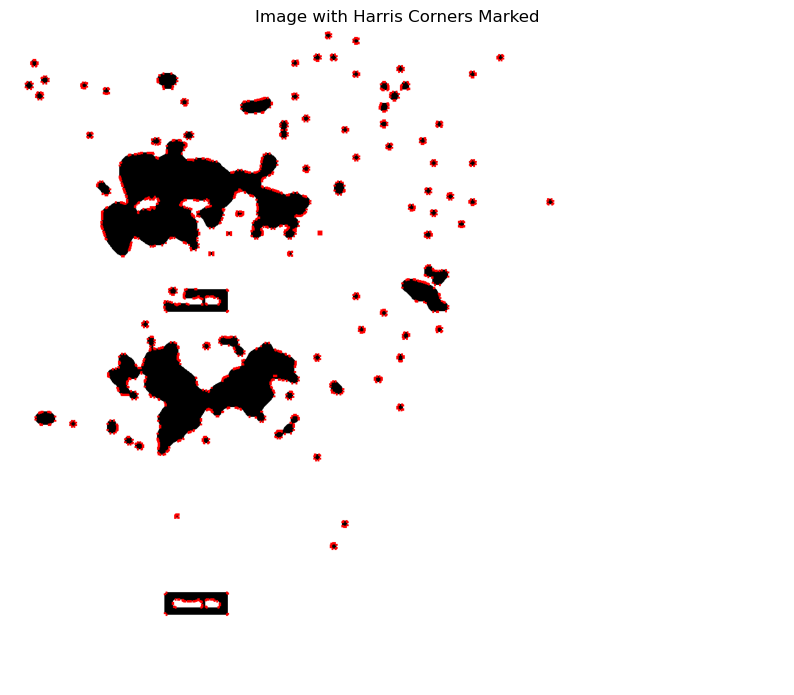

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dst = cv2.cornerHarris(gray_closed_image_float32, 2, 3, 0.04)

dst_dilated = cv2.dilate(dst, None)

if len(resized_closed_image.shape) == 2 or resized_closed_image.shape[2] == 1:
    image_for_marking = cv2.cvtColor(resized_closed_image, cv2.COLOR_GRAY2BGR)
else:
    image_for_marking = resized_closed_image.copy()

threshold = 0.01 * dst.max()
image_for_marking[dst_dilated > threshold] = [0, 0, 255] 

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_for_marking, cv2.COLOR_BGR2RGB)) 
plt.title('Image with Harris Corners Marked')
plt.axis('off')
plt.show()


## EDGE DETECTED IMAGE WITH THE REGION OF INTEREST 

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

question_roi_1 = (216, 100, 500, 370)  
question_roi_2 = (231, 578, 300, 400) 

cv2.rectangle(edges_colored, (question_roi_1[0], question_roi_1[1]), 
              (question_roi_1[0] + question_roi_1[2], question_roi_1[1] + question_roi_1[3]), 
              (0, 255, 0), 2)  

cv2.rectangle(edges_colored, (question_roi_2[0], question_roi_2[1]), 
              (question_roi_2[0] + question_roi_2[2], question_roi_2[1] + question_roi_2[3]), 
              (255, 0, 0), 2) 


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

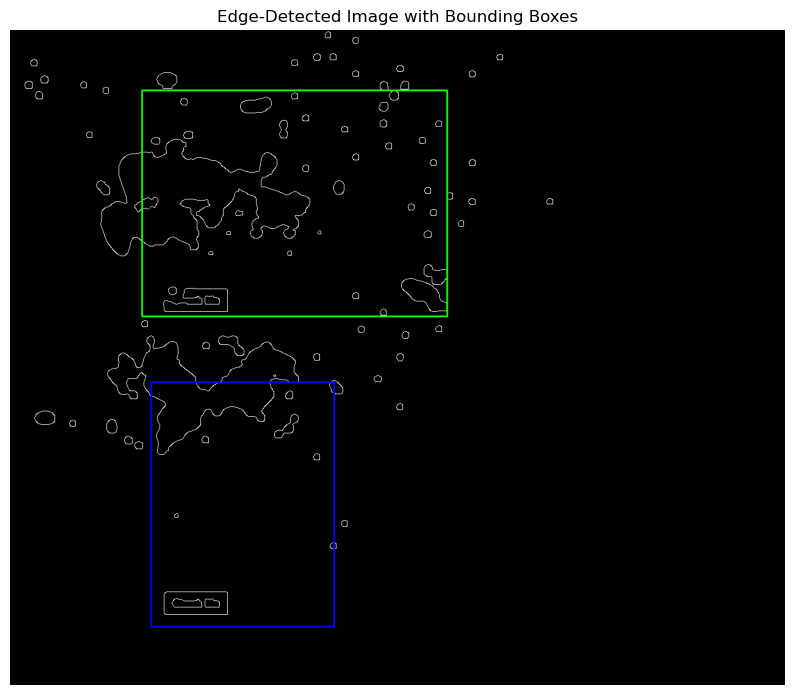

In [11]:
edges_colored_rgb = cv2.cvtColor(edges_colored, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(edges_colored_rgb)
plt.title('Edge-Detected Image with Bounding Boxes')
plt.axis('off')
plt.show()


### REGION OF INTEREST (ROIs) DENSITY

In [12]:
question_roi_1 = (216, 100, 500, 370) 
question_roi_2 = (231, 578, 300, 400)  

edges_roi_1 = edges[question_roi_1[1]:question_roi_1[1]+question_roi_1[3], question_roi_1[0]:question_roi_1[0]+question_roi_1[2]]
edges_roi_2 = edges[question_roi_2[1]:question_roi_2[1]+question_roi_2[3], question_roi_2[0]:question_roi_2[0]+question_roi_2[2]]

density_roi_1 = np.sum(edges_roi_1) / (question_roi_1[2] * question_roi_1[3])
density_roi_2 = np.sum(edges_roi_2) / (question_roi_2[2] * question_roi_2[3])

print("Edge Density in ROI 1:", density_roi_1)
print("Edge Density in ROI 2:", density_roi_2)


Edge Density in ROI 1: 4.475594594594595
Edge Density in ROI 2: 2.737


### Non ROI DENSITY

In [13]:
total_edge_density = np.sum(edges) / (edges.shape[0] * edges.shape[1])
print("Total Edge Density in the Image:", total_edge_density)

Total Edge Density in the Image: 1.407755245678089


In [14]:
density_roi_1 = np.sum(edges_roi_1) / (question_roi_1[2] * question_roi_1[3])
density_roi_2 = np.sum(edges_roi_2) / (question_roi_2[2] * question_roi_2[3])
print("Edge Density in ROI 1:", density_roi_1)
print("Edge Density in ROI 2:", density_roi_2)

Edge Density in ROI 1: 4.475594594594595
Edge Density in ROI 2: 2.737


In [15]:
total_density_in_rois = (np.sum(edges_roi_1) + np.sum(edges_roi_2)) / ((edges.shape[0] * edges.shape[1]))
density_outside_rois = total_edge_density - total_density_in_rois
print("Edge Density Outside ROIs:", density_outside_rois)

Edge Density Outside ROIs: 0.5599238991774073


## CORNER DETECTED IMAGE WITH THE REGION OF INTEREST

In [16]:

corner_vis = np.zeros_like(resized_closed_image)  
corner_vis[dst > 0.01 * dst.max()] = 255  

if len(corner_vis.shape) == 2 or corner_vis.shape[2] == 1:
    corner_vis_color = cv2.cvtColor(corner_vis, cv2.COLOR_GRAY2BGR)
else:
    corner_vis_color = corner_vis.copy()

cv2.rectangle(corner_vis_color, (question_roi_1[0], question_roi_1[1]), 
              (question_roi_1[0] + question_roi_1[2], question_roi_1[1] + question_roi_1[3]), 
              (255, 0, 0), 2) 

cv2.rectangle(corner_vis_color, (question_roi_2[0], question_roi_2[1]), 
              (question_roi_2[0] + question_roi_2[2], question_roi_2[1] + question_roi_2[3]), 
              (0, 255, 0), 2)  

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

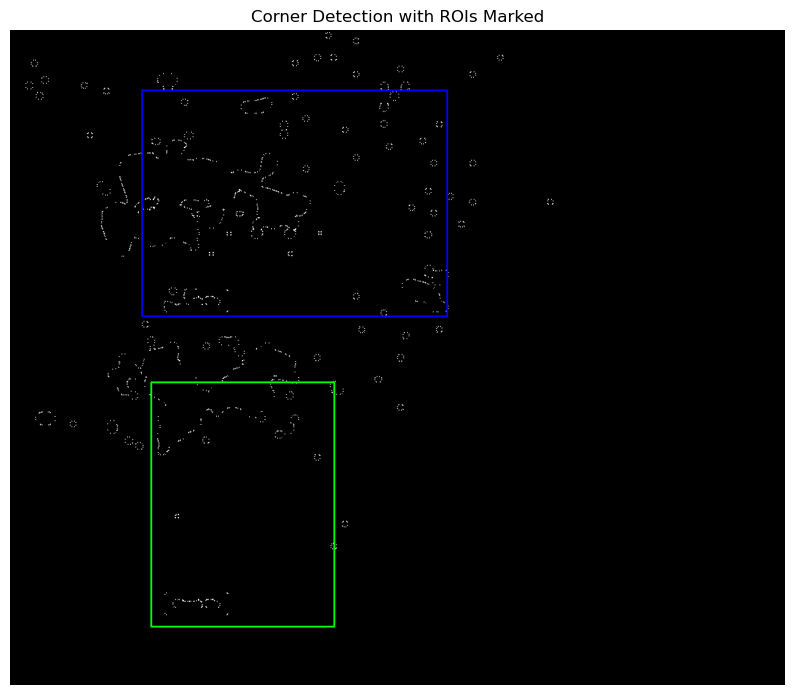

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(corner_vis_color, cv2.COLOR_BGR2RGB)) 
plt.title('Corner Detection with ROIs Marked')
plt.axis('off')
plt.show()


### REGION OF INETEREST (ROI's) DENSITY

In [18]:
corner_binary = np.zeros_like(dst, dtype=np.uint8)
corner_binary[dst > 0.01 * dst.max()] = 1

corners_roi_1 = corner_binary[question_roi_1[1]:question_roi_1[1]+question_roi_1[3], question_roi_1[0]:question_roi_1[0]+question_roi_1[2]]
corners_roi_2 = corner_binary[question_roi_2[1]:question_roi_2[1]+question_roi_2[3], question_roi_2[0]:question_roi_2[0]+question_roi_2[2]]

density_roi_1 = np.sum(corners_roi_1) / (question_roi_1[2] * question_roi_1[3])
density_roi_2 = np.sum(corners_roi_2) / (question_roi_2[2] * question_roi_2[3])

print("Corner Density in ROI 1:", density_roi_1)
print("Corner Density in ROI 2:", density_roi_2)

Corner Density in ROI 1: 0.008005405405405406
Corner Density in ROI 2: 0.0036333333333333335


### CHEAT IMAGE

In [19]:
import cv2
image_path = r"D:\CV_DATASETS\cheat\Screenshot 2024-02-22 022650.jpg"
image = cv2.imread(image_path)
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### GETTING A PRE PROCESSED IMAGE

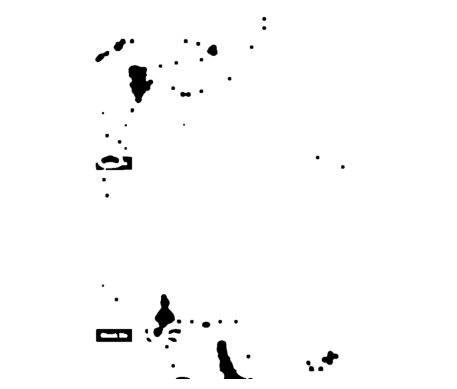

In [20]:
from matplotlib import pyplot as plt
import cv2

image_path = r"D:\CV_DATASETS\cheat\Screenshot 2024-02-22 022650.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

threshold_value = 127 
max_value = 255
_, binary_image = cv2.threshold(blurred_image, threshold_value, max_value, cv2.THRESH_BINARY)

kernel_size = (5, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

new_width, new_height = 1270, 1074

resized_closed_image = cv2.resize(closed_image, (new_width, new_height))
resized_closed_image = cv2.cvtColor(resized_closed_image, cv2.COLOR_BGR2RGB)

plt.imshow(resized_closed_image)
plt.axis('off')
plt.show()

## EDGE DETECTION ALGORITHM - CANNY

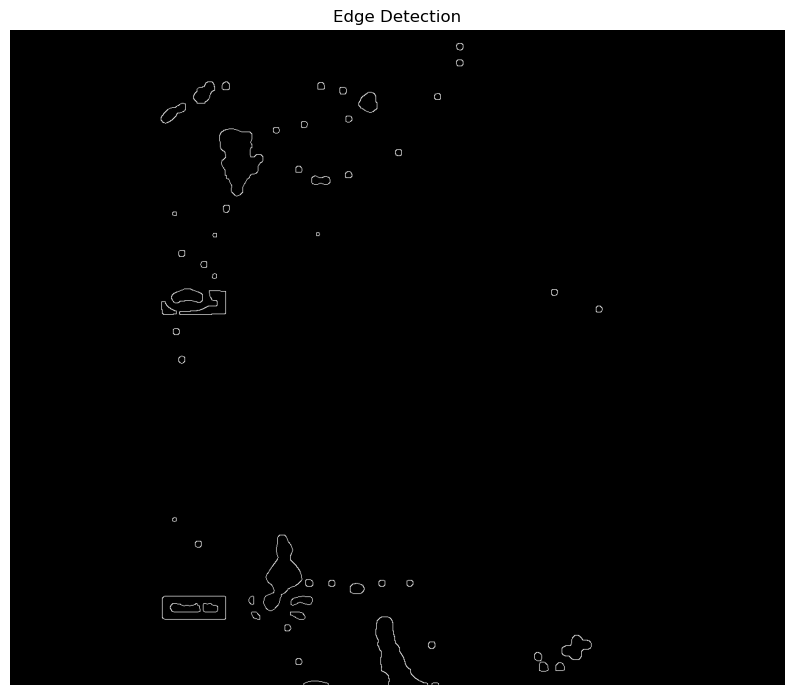

In [21]:
lower_threshold = 50  
upper_threshold = 150

edges = cv2.Canny(resized_closed_image, lower_threshold, upper_threshold)

plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

In [22]:
if len(resized_closed_image.shape) == 3 and resized_closed_image.shape[2] == 3:
    gray_closed_image = cv2.cvtColor(resized_closed_image, cv2.COLOR_BGR2GRAY)
else:
    gray_closed_image = resized_closed_image.copy()

## CORNER DETECTION ALGORITHM - HARRIS

In [23]:
gray_closed_image_float32 = np.float32(gray_closed_image)

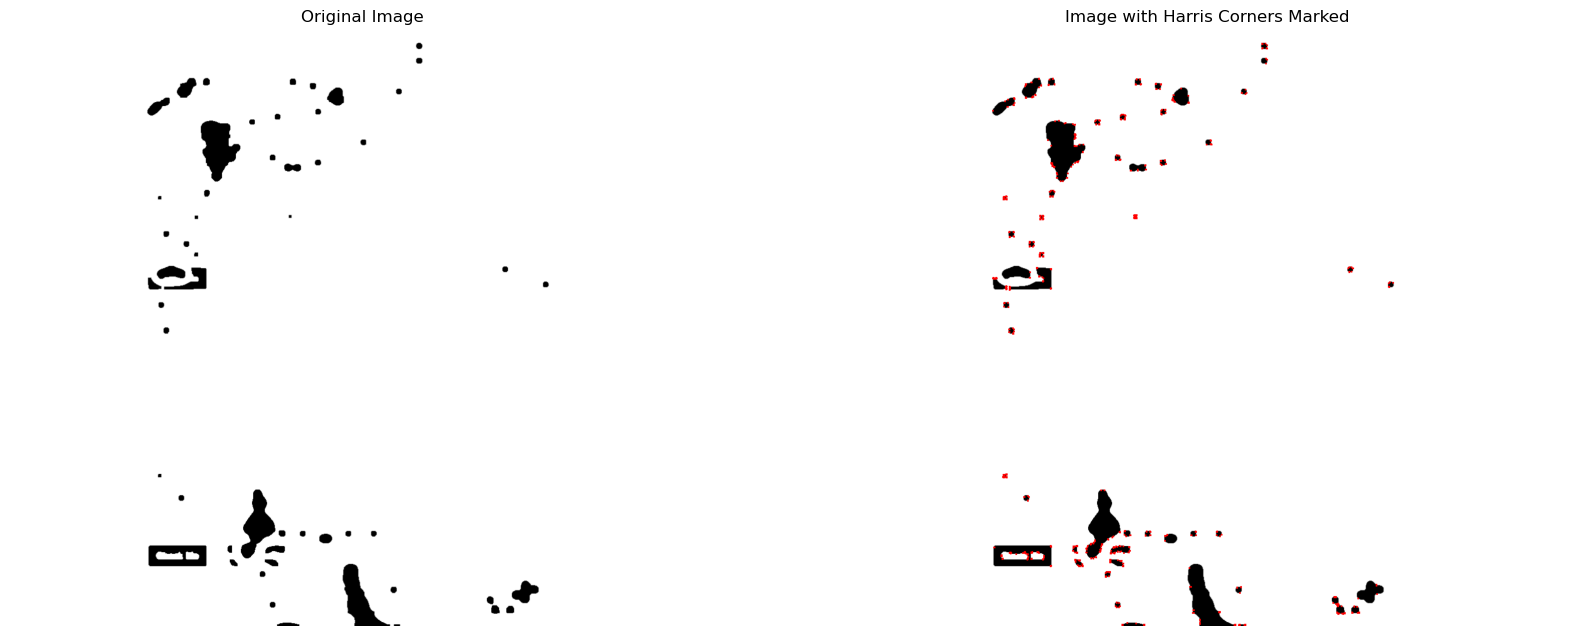

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


block_size = 2  
ksize = 3       
k = 0.04        

dst = cv2.cornerHarris(gray_closed_image_float32, block_size, ksize, k)

dst_dilated = cv2.dilate(dst, None)

if len(resized_closed_image.shape) == 2 or resized_closed_image.shape[2] == 1:
    image_for_marking = cv2.cvtColor(resized_closed_image, cv2.COLOR_GRAY2BGR)
else:
    image_for_marking = resized_closed_image.copy()
threshold = 0.01 * dst.max()
image_for_marking[dst_dilated > threshold] = [0, 0, 255]  

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
if len(resized_closed_image.shape) == 2 or resized_closed_image.shape[2] == 1:
    plt.imshow(resized_closed_image, cmap='gray') 
else:
    plt.imshow(cv2.cvtColor(resized_closed_image, cv2.COLOR_BGR2RGB)) 
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_for_marking, cv2.COLOR_BGR2RGB)) 
plt.title('Image with Harris Corners Marked')
plt.axis('off')

plt.show()


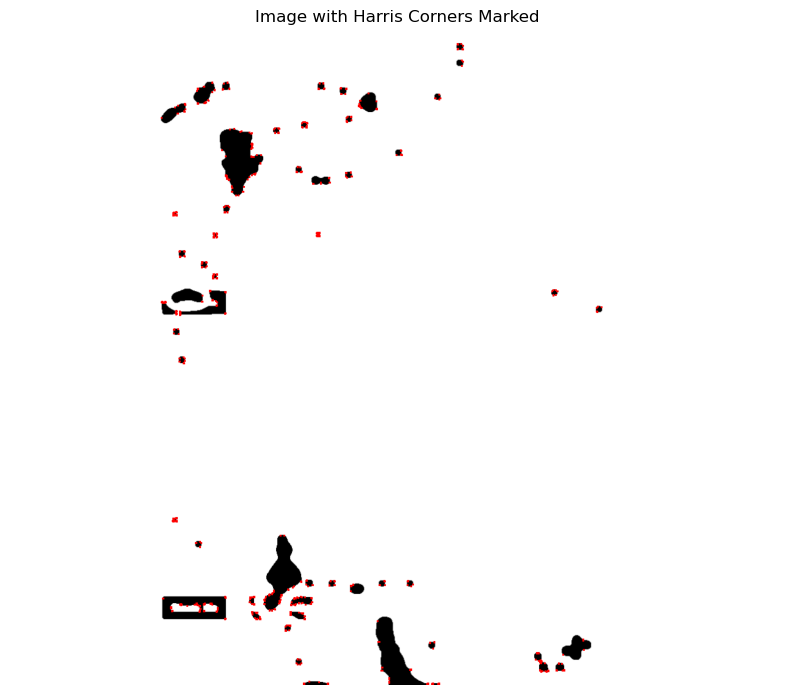

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dst = cv2.cornerHarris(gray_closed_image_float32, 2, 3, 0.04)

dst_dilated = cv2.dilate(dst, None)

if len(resized_closed_image.shape) == 2 or resized_closed_image.shape[2] == 1:
    image_for_marking = cv2.cvtColor(resized_closed_image, cv2.COLOR_GRAY2BGR)
else:
    image_for_marking = resized_closed_image.copy()

threshold = 0.01 * dst.max()
image_for_marking[dst_dilated > threshold] = [0, 0, 255] 

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_for_marking, cv2.COLOR_BGR2RGB)) 
plt.title('Image with Harris Corners Marked')
plt.axis('off')
plt.show()


## EDGE DETECTED IMAGE WITH THE REGION OF INTEREST 

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

question_roi_1 = (216, 100, 500, 370)  
question_roi_2 = (231, 578, 300, 400)  

cv2.rectangle(edges_colored, (question_roi_1[0], question_roi_1[1]), 
              (question_roi_1[0] + question_roi_1[2], question_roi_1[1] + question_roi_1[3]), 
              (0, 255, 0), 2) 

cv2.rectangle(edges_colored, (question_roi_2[0], question_roi_2[1]), 
              (question_roi_2[0] + question_roi_2[2], question_roi_2[1] + question_roi_2[3]), 
              (255, 0, 0), 2) 


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

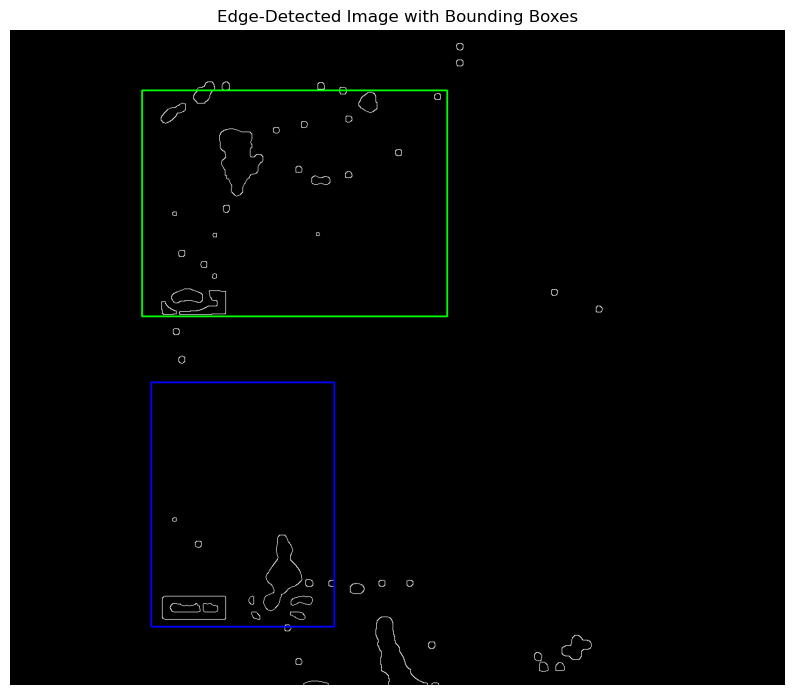

In [27]:
edges_colored_rgb = cv2.cvtColor(edges_colored, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(edges_colored_rgb)
plt.title('Edge-Detected Image with Bounding Boxes')
plt.axis('off')  
plt.show()


### REGION OF INTEREST (ROIs) DENSITY

In [28]:
question_roi_1 = (216, 100, 500, 370) 
question_roi_2 = (231, 578, 300, 400) 

edges_roi_1 = edges[question_roi_1[1]:question_roi_1[1]+question_roi_1[3], question_roi_1[0]:question_roi_1[0]+question_roi_1[2]]
edges_roi_2 = edges[question_roi_2[1]:question_roi_2[1]+question_roi_2[3], question_roi_2[0]:question_roi_2[0]+question_roi_2[2]]

density_roi_1 = np.sum(edges_roi_1) / (question_roi_1[2] * question_roi_1[3])
density_roi_2 = np.sum(edges_roi_2) / (question_roi_2[2] * question_roi_2[3])

print("Edge Density in ROI 1:", density_roi_1)
print("Edge Density in ROI 2:", density_roi_2)


Edge Density in ROI 1: 2.4066486486486487
Edge Density in ROI 2: 2.54575


### Non ROI DENSITY

In [29]:
total_edge_density = np.sum(edges) / (edges.shape[0] * edges.shape[1])
print("Total Edge Density in the Image:", total_edge_density)

Total Edge Density in the Image: 0.8093190515989971


In [30]:
density_roi_1 = np.sum(edges_roi_1) / (question_roi_1[2] * question_roi_1[3])
density_roi_2 = np.sum(edges_roi_2) / (question_roi_2[2] * question_roi_2[3])
print("Edge Density in ROI 1:", density_roi_1)
print("Edge Density in ROI 2:", density_roi_2)

Edge Density in ROI 1: 2.4066486486486487
Edge Density in ROI 2: 2.54575


In [31]:
total_density_in_rois = (np.sum(edges_roi_1) + np.sum(edges_roi_2)) / ((edges.shape[0] * edges.shape[1]))
density_outside_rois = total_edge_density - total_density_in_rois
print("Edge Density Outside ROIs:", density_outside_rois)

Edge Density Outside ROIs: 0.2589297497030748


## CORNER DETECTED IMAGE WITH THE REGION OF INTEREST

In [32]:

corner_vis = np.zeros_like(resized_closed_image)  
corner_vis[dst > 0.01 * dst.max()] = 255  

if len(corner_vis.shape) == 2 or corner_vis.shape[2] == 1:
    corner_vis_color = cv2.cvtColor(corner_vis, cv2.COLOR_GRAY2BGR)
else:
    corner_vis_color = corner_vis.copy()

cv2.rectangle(corner_vis_color, (question_roi_1[0], question_roi_1[1]), 
              (question_roi_1[0] + question_roi_1[2], question_roi_1[1] + question_roi_1[3]), 
              (255, 0, 0), 2) 

cv2.rectangle(corner_vis_color, (question_roi_2[0], question_roi_2[1]), 
              (question_roi_2[0] + question_roi_2[2], question_roi_2[1] + question_roi_2[3]), 
              (0, 255, 0), 2)  


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

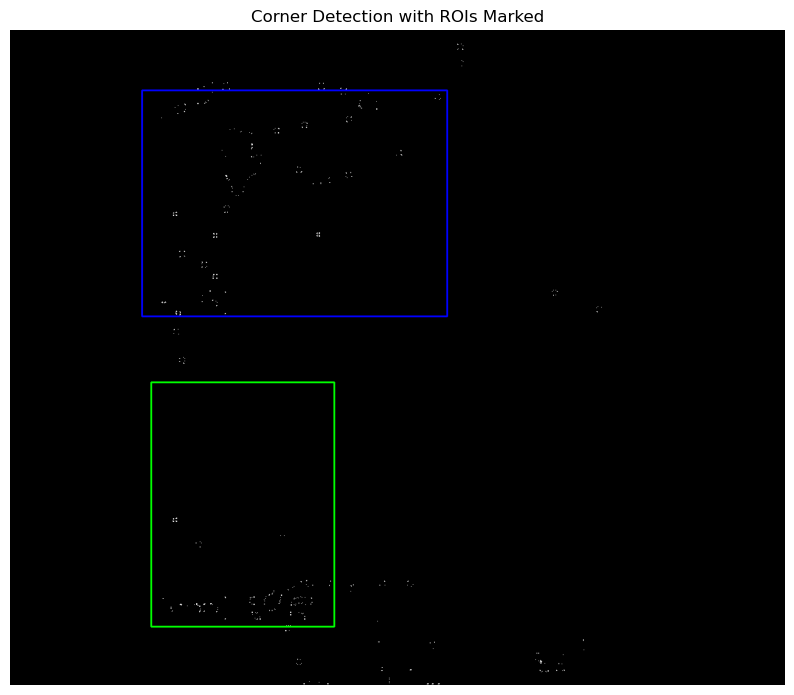

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(corner_vis_color, cv2.COLOR_BGR2RGB))  
plt.title('Corner Detection with ROIs Marked')
plt.axis('off')
plt.show()


### REGION OF INETEREST (ROI's) DENSITY

In [34]:
corner_binary = np.zeros_like(dst, dtype=np.uint8)
corner_binary[dst > 0.01 * dst.max()] = 1

corners_roi_1 = corner_binary[question_roi_1[1]:question_roi_1[1]+question_roi_1[3], question_roi_1[0]:question_roi_1[0]+question_roi_1[2]]
corners_roi_2 = corner_binary[question_roi_2[1]:question_roi_2[1]+question_roi_2[3], question_roi_2[0]:question_roi_2[0]+question_roi_2[2]]

density_roi_1 = np.sum(corners_roi_1) / (question_roi_1[2] * question_roi_1[3])
density_roi_2 = np.sum(corners_roi_2) / (question_roi_2[2] * question_roi_2[3])

print("Corner Density in ROI 1:", density_roi_1)
print("Corner Density in ROI 2:", density_roi_2)

Corner Density in ROI 1: 0.0017945945945945945
Corner Density in ROI 2: 0.0018583333333333334
